Goal: To practice creating visualizations and utilizing pandas functions while analyzing stock price trends from 2006 to 2016, a period closely tied to the Financial Crisis. Data source is obtained from an outside source (pickle file).

In [190]:
import pandas as pd
import numpy as np
import datetime

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

Banks: <br> 1. Bank of America (BAC)<br> 2. CitiGroup (C)<br> 3. Goldman Salchs (GS)<br> 4. JPMorgan Chase (JPM)<br> 5. Morgan Stanley (MS)<br> 6. Wells Fargo (WFC)

In [191]:
#setting range of start and end datetime
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016,1,1)

In [192]:
tickers = ["BAC", "C", "GS", "JPM", "MS", "WFC"] #tickers are symbols used to identify a company's stock.

In [193]:
stocks = pd.read_pickle("all_banks")

In [194]:
stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker           ...     MS                                  WFC         \
Stock Info    Volume  ...   Open   High    Low  Close   Volume   Open   High   
Date                  ...                                                      
2006-01-03   1537660  ...  57.17  58.49  56.74  58.31  5377000  31.60  31.98   
2006-01-04   1871020  ...  58.70  59.28  58.35  58.35  7977800  31.80  31.82   
2006-01-05   1143160  ...  58.55  58.59  58.02  58.51  5778000  31.50  31.56   
2006-01-06   1370250  ...  58.77  58.85  58.05  58.57  6889800  31.58  31.78   
2006-01-09   1680740  ...  58.63  59.29  58.62  59.19  4144500  31.68  31.82   

Bank Ticker                          
Stock Info     Low  Close    Volume  
Date                                 
2006-01-03   31.20  31.90  11016400  
2006-01-04   31.36  31.53  10871000  
2006-01-05   31.31  31.50  10158000  
2006-01-06   31.38  31.68   8403800  
2006-01-09   31.56  31.68   5619600  

[5 rows x 30 columns]

In [195]:
stocks.shape #2517 cols, 30 rows

(2517, 30)

In [196]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (BAC, Open)    2517 non-null   float64
 1   (BAC, High)    2517 non-null   float64
 2   (BAC, Low)     2517 non-null   float64
 3   (BAC, Close)   2517 non-null   float64
 4   (BAC, Volume)  2517 non-null   int64  
 5   (C, Open)      2517 non-null   float64
 6   (C, High)      2517 non-null   float64
 7   (C, Low)       2517 non-null   float64
 8   (C, Close)     2517 non-null   float64
 9   (C, Volume)    2517 non-null   int64  
 10  (GS, Open)     2517 non-null   float64
 11  (GS, High)     2517 non-null   float64
 12  (GS, Low)      2517 non-null   float64
 13  (GS, Close)    2517 non-null   float64
 14  (GS, Volume)   2517 non-null   int64  
 15  (JPM, Open)    2517 non-null   float64
 16  (JPM, High)    2517 non-null   float64
 17  (JPM, Low)     2517 non-null   flo

In [197]:
stocks.xs(key = "Close",axis=1,level="Stock Info").max() 
#Citigroup has the highest close price (last price which a stock is traded during a regular trading day) through the time period.

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [198]:
#finding percent change for each bank using pandas pct_change() method and returning it in an empty data frame, return.
returns = pd.DataFrame()
for eachtick in tickers:
    returns[eachtick + " Return"] = stocks[eachtick]["Close"].pct_change()

In [199]:
returns.head()


,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


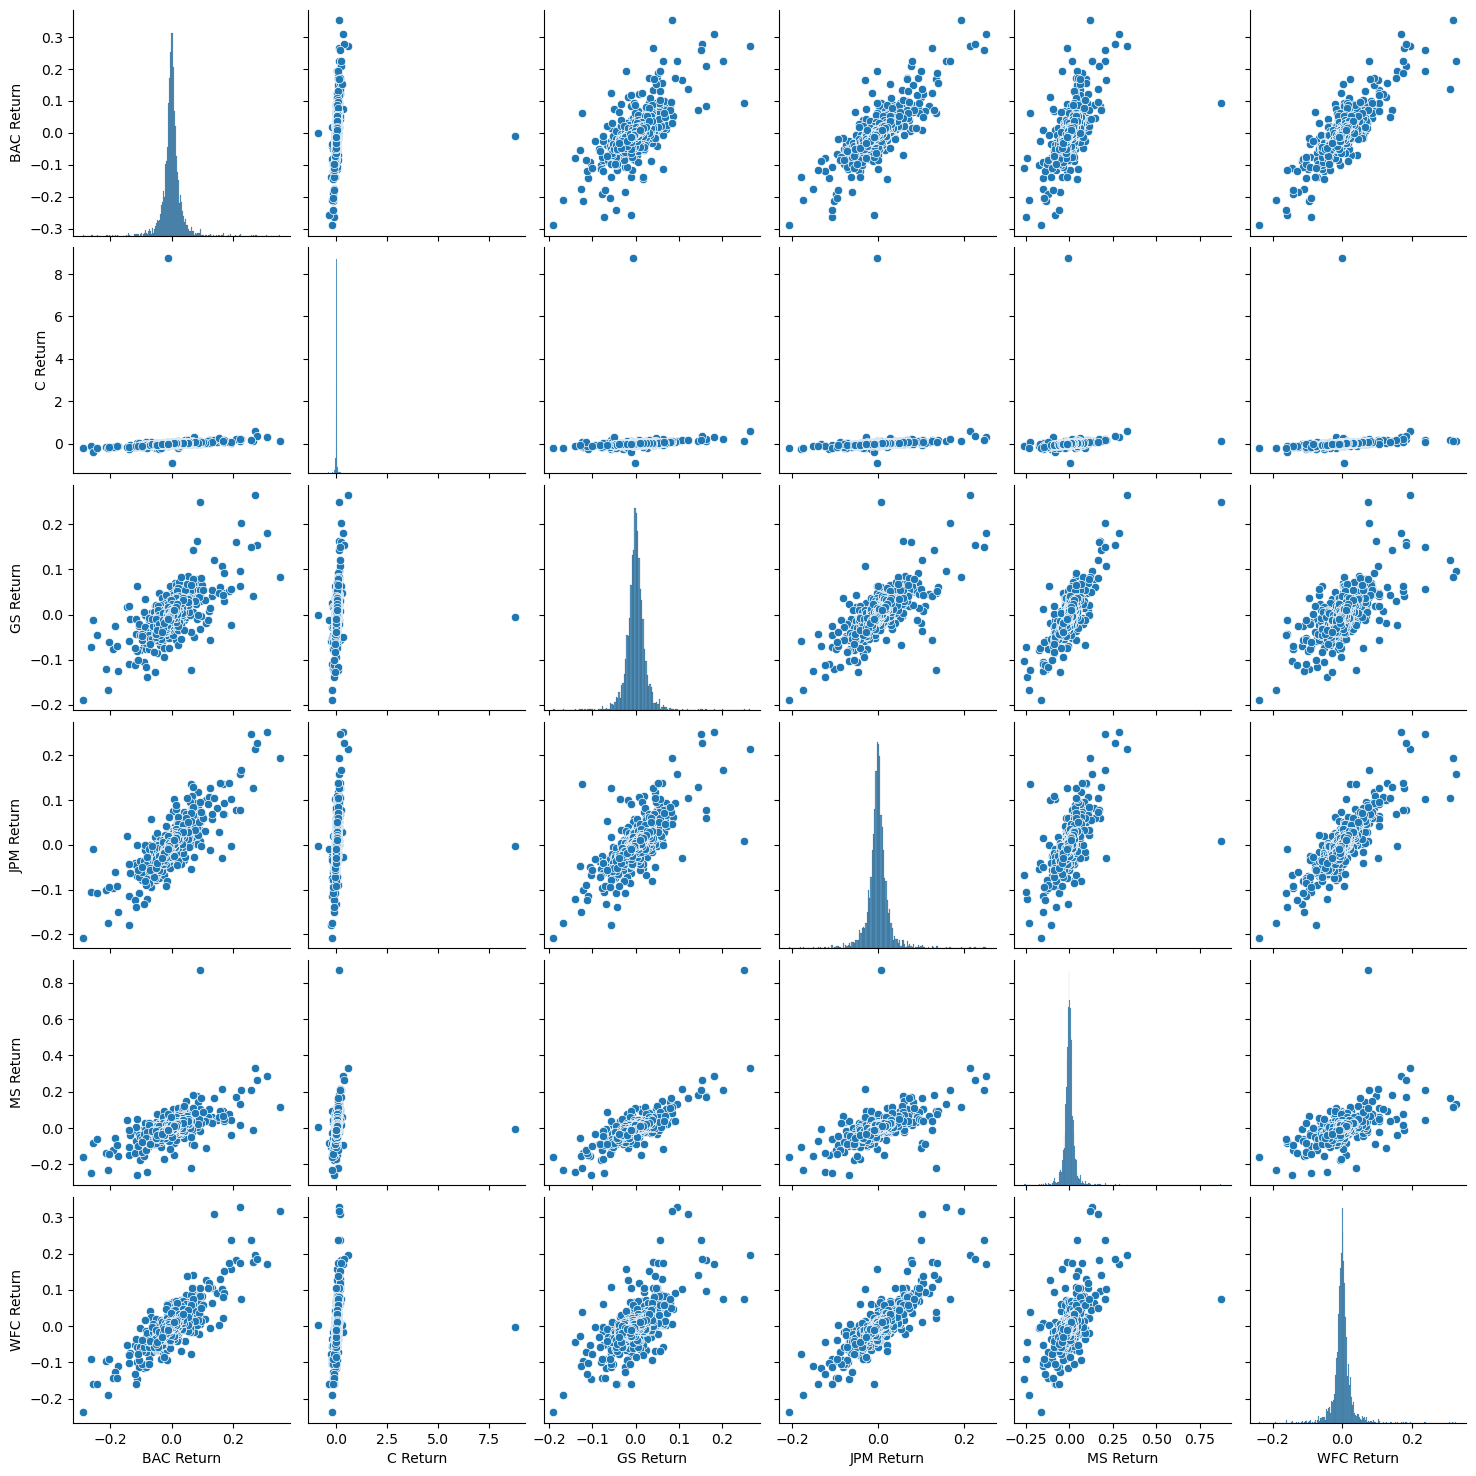

In [200]:
sns.pairplot(returns[1:]) 
plt.show()
#most graphs show a linear positive line for data points, but Citigroup looks much different than the rest
#it's an outlier with returns close to 0.

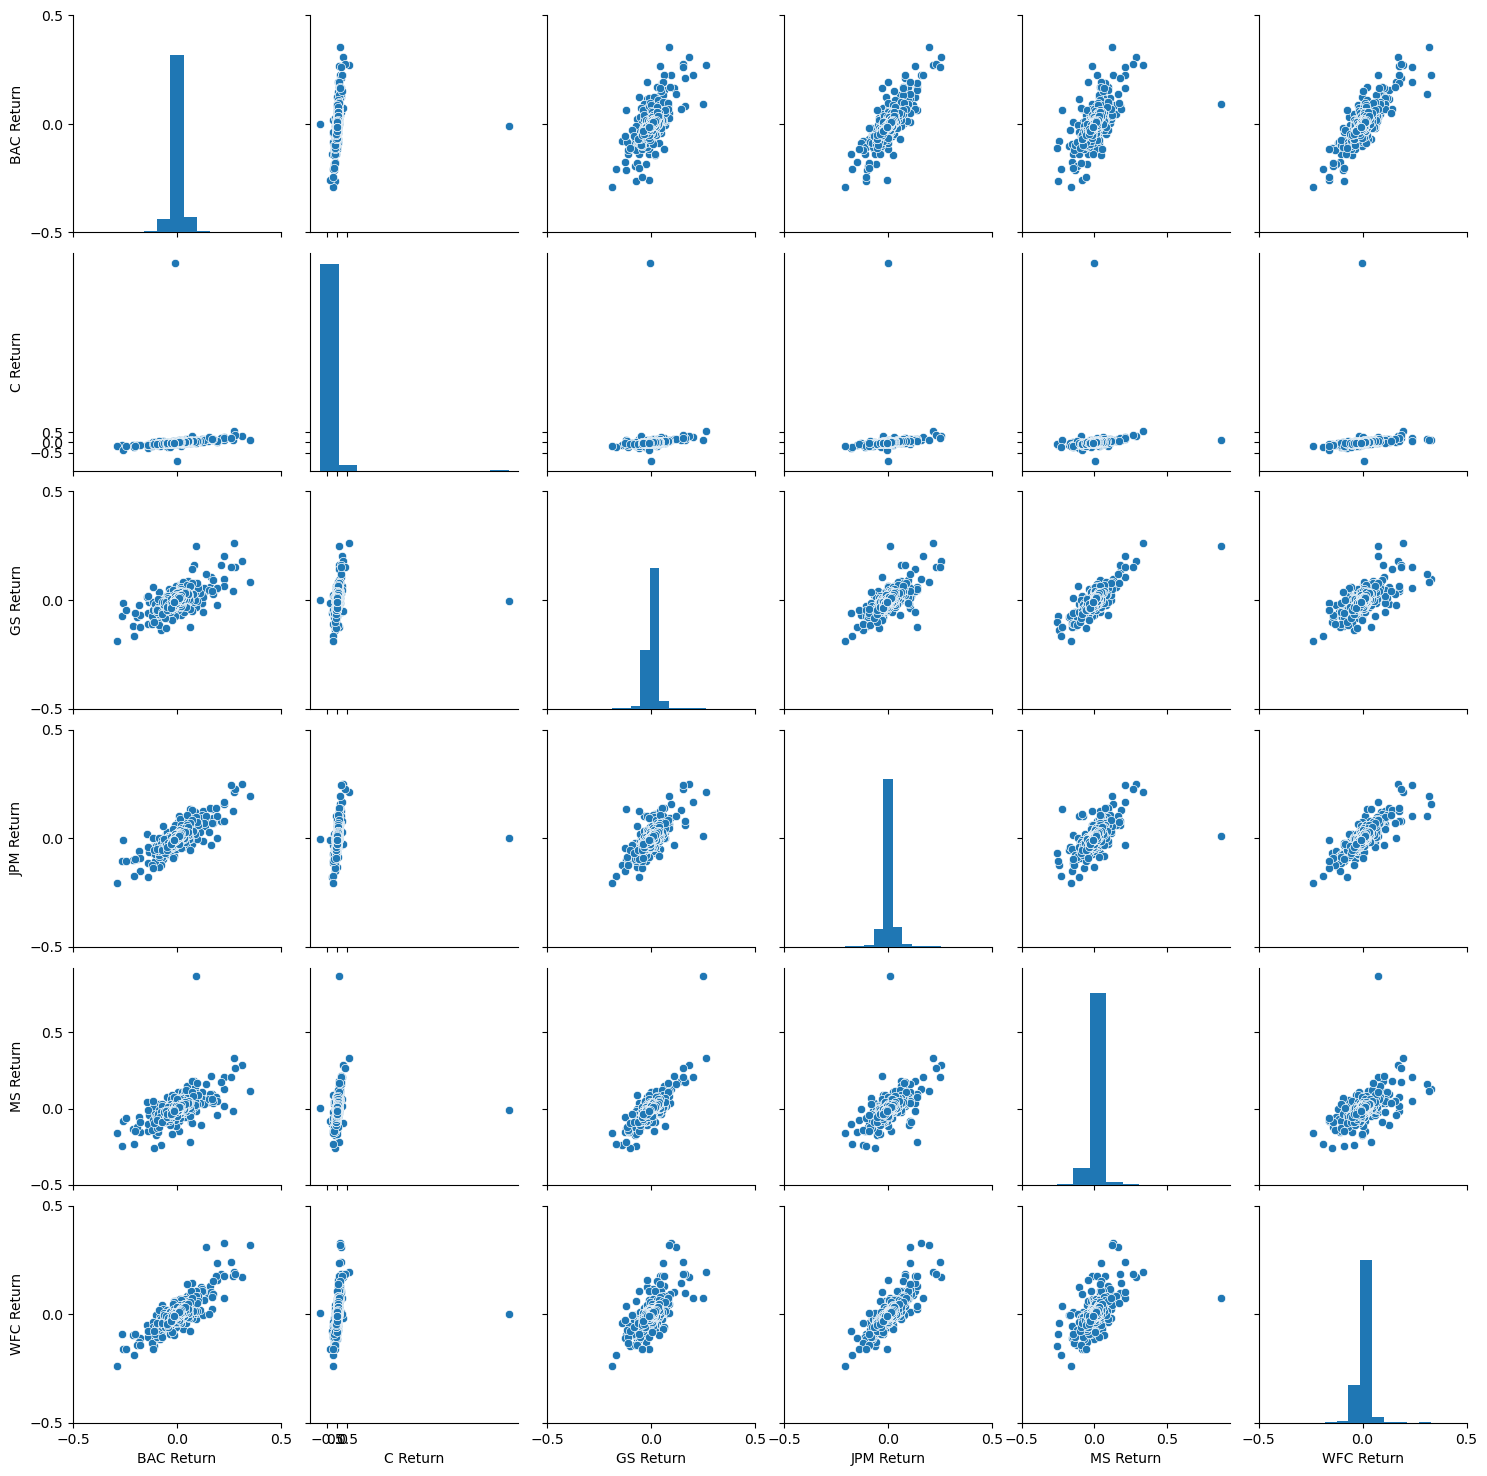

In [201]:
pg = sns.PairGrid(returns.dropna())
pg.map_diag(plt.hist)
pg.map_upper(sns.scatterplot)
pg.map_lower(sns.scatterplot)

for ax in pg.axes.flat:
    ax.set_yticks([-.5,0,.5])
    ax.set_xticks([-.5,0,.5])
#using pairgrid we can see that if the points don't make a clear shape or are in a horizontal and vertical direction, they aren't correlated.
#however, if the points make in a diagonal direction from bottom left to top right, they are more correlated


<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

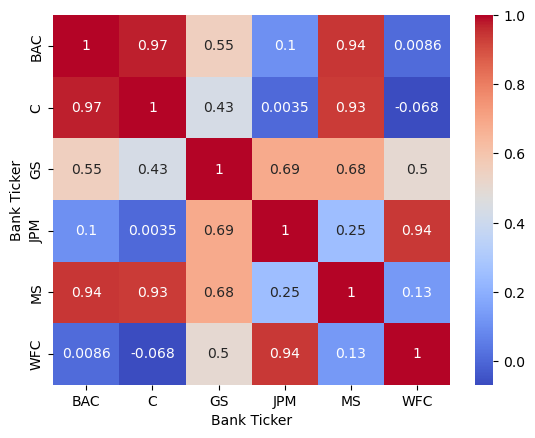

In [202]:
sns.heatmap(stocks.xs("Close",level=1,axis=1).corr(),annot=True,cmap="coolwarm")
#using pearson's correlation coefficient tests for the linear correlation between two continuous sets of data.
#correlation can range from -1 to 1, the larger the absolute value is to the coefficient, the stronger the variables.
#a correlation of 1 represent a perfect linear relationship. a correlation close to 0 represent no linear relationship between variables.

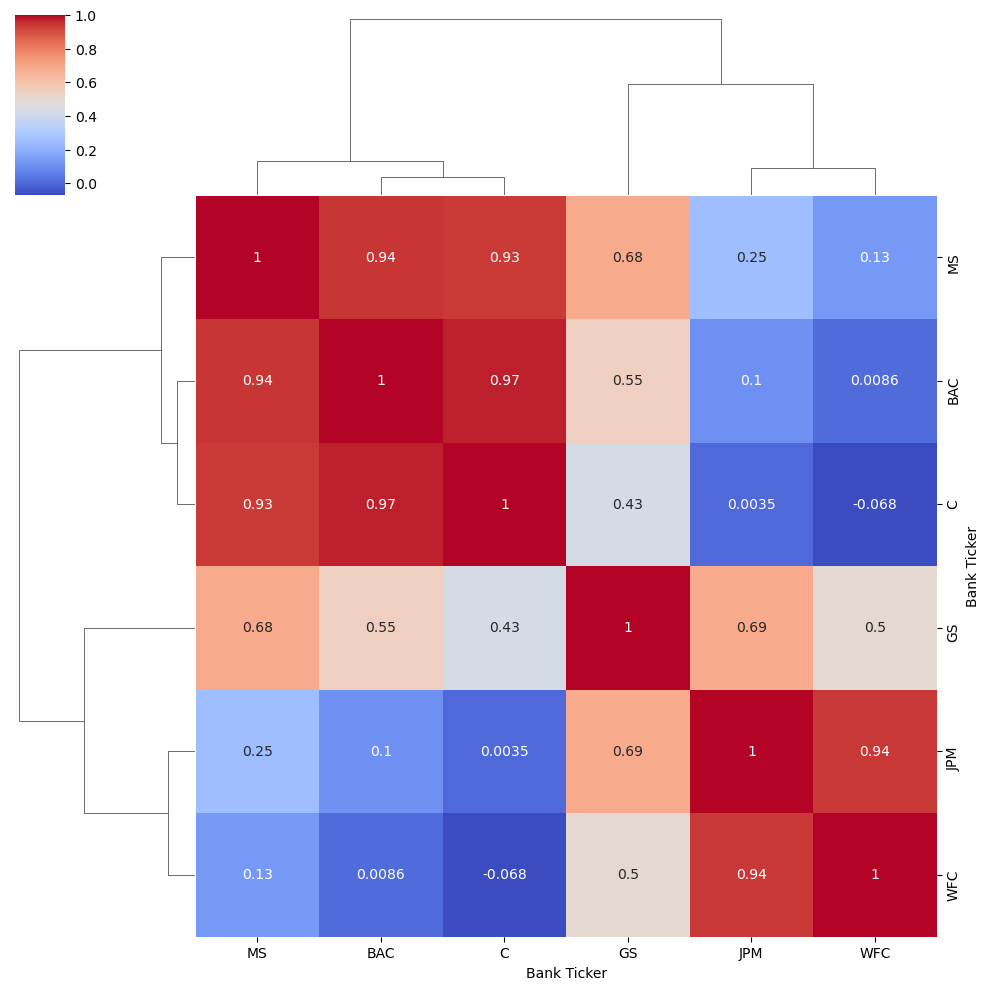

In [203]:
sns.clustermap(stocks.xs(key="Close", axis=1, level="Stock Info").corr(), annot=True, cmap="coolwarm")
#Bank of America and Citigroup (0.97) and Bank of America and Morgan Stanley (0.94) have strong correlation
#which we can assume will have, similar returns.
#JP Morgan and Wells Fargo (0.94) and Morgan Stanley and Citigroup (0.93) have strong correlations as well, which leads to similar conclusion.

<Axes: >

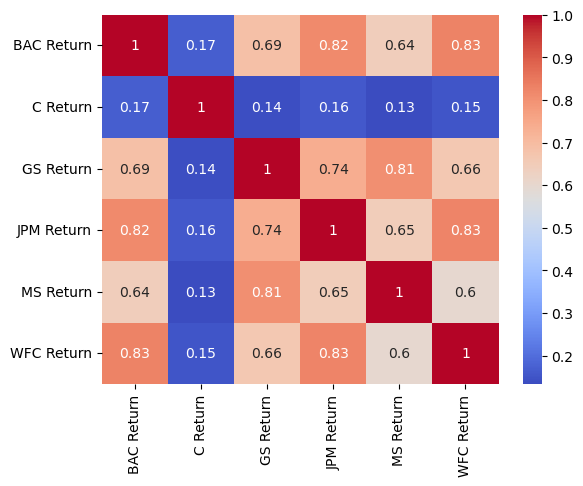

In [204]:
#returns data correlated heat map after dropping NA and NaN, then calculating the correlation matrix
#which shows pairwise correlations between all columns.
sns.heatmap(returns.dropna().corr(), annot = True, cmap="coolwarm")
#now we see BAC and C only have 0.17, MS and BAC only have 0.64, MS and C only have 0.13, which we see they aren't as correlated as we thought.
#the correlation level has gone down significantly, however JPM and WFC still remain somewhat high with 0.83.

In [205]:
stocks.xs("Close",level=1, axis=1).agg("mean")
#the average magnitutde of stock prices vary for all the tickers, but MS and WFC and relatively close, whereas JPM is nearly double of BAC. 
#C and GS are relatively high in stock closing price.

Bank Ticker
BAC     22.174617
C      145.372658
GS     158.482058
JPM     45.985391
MS      36.006198
WFC     35.598411
dtype: float64

In [206]:
returns.dropna().idxmin() 
#finding day with the worst returns and drops of each company.
#4 companies had the worst return during Obama inauguration day (Jan 20, 2009).

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [207]:
returns.dropna().idxmax() 
#finding day with the best returns and gains of each company.
#In 2011, May 9, Citigroup had stock split because its stock price has fallen under $1 during financial crisis, and the 1-10 reverse stock split was
#initiated with the intent of helping the company rise its stock back up to the double digits.
#Reverse splitting is increases the price of a company's shares but don't impact the corporation value.
#Morgan Stanley was able to secure funding from Japan's Mitsubishi UFJ Financial Group at Oct 10, 2008.

BAC Return   2009-04-09
C Return     2011-05-09
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [208]:
returns.dropna().std()
#finding the riskiest stock over the time period, by comparing standard devitation.
#higher standard devitation typically means higher risk.
#in this case: Citigroup.

BAC Return    0.036650
C Return      0.179969
GS Return     0.025346
JPM Return    0.027656
MS Return     0.037820
WFC Return    0.030233
dtype: float64

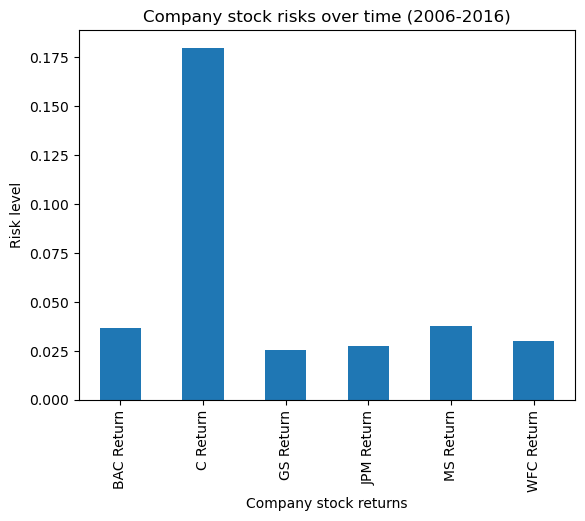

In [209]:
returns.std().plot(kind="bar")
plt.ylabel("Risk level")
plt.xlabel("Company stock returns")
plt.title("Company stock risks over time (2006-2016)")
plt.show()
#citigroup has highest standard devitation compared to the rest of the companies, therefore has the highest risk associated.

In [210]:
returns.loc["2007-01-01" : "2009-12-31"].std()

BAC Return    0.058348
C Return      0.063353
GS Return     0.038460
JPM Return    0.043685
MS Return     0.060341
WFC Return    0.049985
dtype: float64

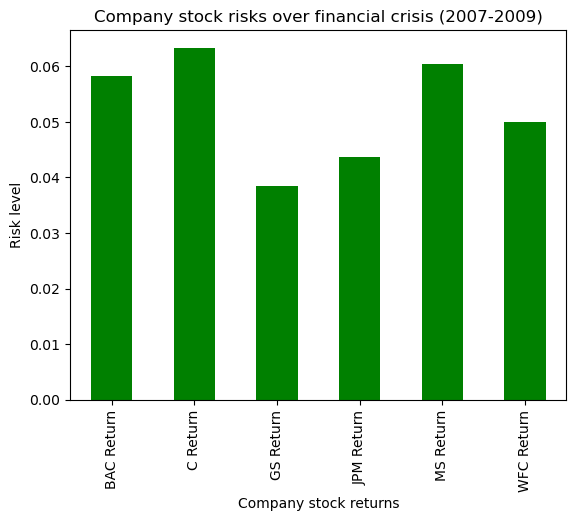

In [218]:
returns.loc["2007-01-01" : "2009-12-31"].std().plot(kind="bar",color="green")
plt.ylabel("Risk level")
plt.xlabel("Company stock returns")
plt.title("Company stock risks over financial crisis (2007-2009)")
plt.show()
#Citigroup(0.063) is associated with the highest risk but Morgan Stanely(0.060) and Bank of America(0.058) also have similar risk level.

/var/folders/1b/w93zwxhn6qx7pwqzz12mwtmm0000gn/T/ipykernel_32064/3151586866.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2007-01-01' : '2009-12-31']['C Return'],bins = 50, color='green')


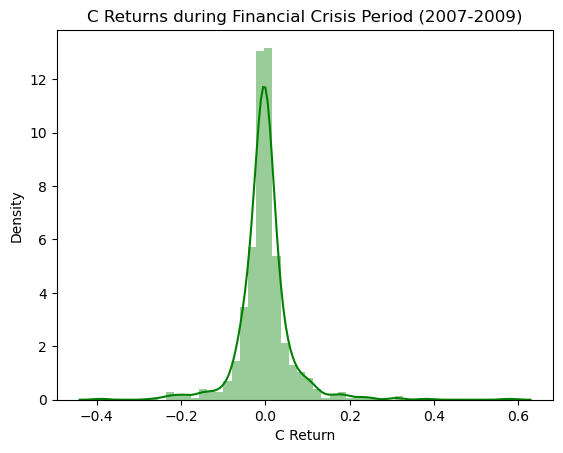

In [212]:
sns.distplot(returns.loc['2007-01-01' : '2009-12-31']['C Return'],bins = 50, color='green')
plt.title("C Returns during Financial Crisis Period (2007-2009)")
plt.show()

/var/folders/1b/w93zwxhn6qx7pwqzz12mwtmm0000gn/T/ipykernel_32064/3378266889.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.loc['2007-01-01' : '2009-12-31']['MS Return'],bins = 50, color='red')


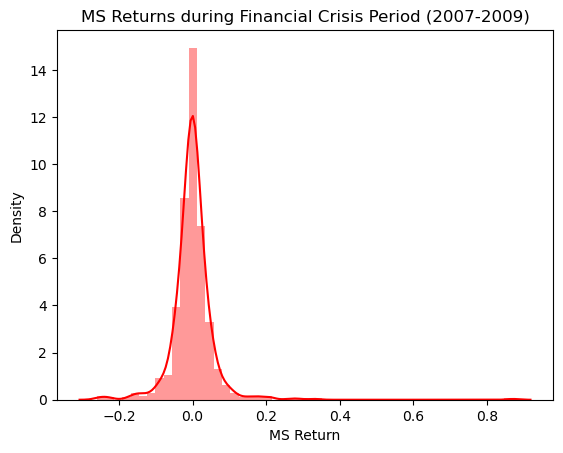

In [213]:
sns.distplot(returns.loc['2007-01-01' : '2009-12-31']['MS Return'],bins = 50, color='red')
plt.title("MS Returns during Financial Crisis Period (2007-2009)")
plt.show()

/var/folders/1b/w93zwxhn6qx7pwqzz12mwtmm0000gn/T/ipykernel_32064/1616601940.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.dropna().reset_index()[returns.dropna().reset_index()['Date'].dt.year==2007]['MS Return'], bins=100,color = 'green', ax=axes[0])
/var/folders/1b/w93zwxhn6qx7pwqzz12mwtmm0000gn/T/ipykernel_32064/1616601940.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functi

Text(0.5, 0.98, '2007 Returns Distribution')

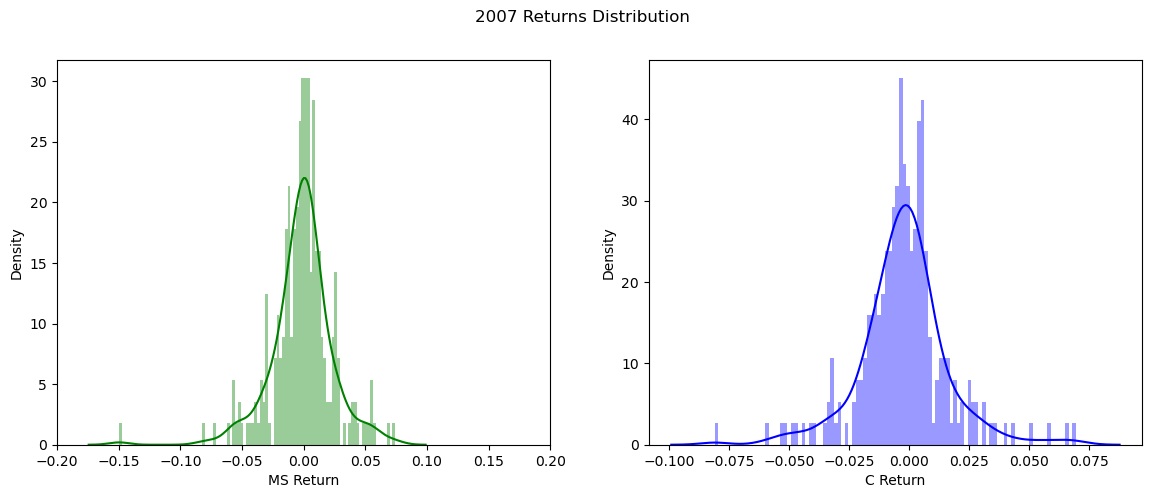

In [214]:
#2007
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
#MS
sns.distplot(returns.dropna().reset_index()[returns.dropna().reset_index()['Date'].dt.year==2007]['MS Return'], bins=100,color = 'green', ax=axes[0])
#C
sns.distplot(returns.dropna().reset_index()[returns.dropna().reset_index()['Date'].dt.year==2007]['C Return'], bins=100,color = 'blue', ax=axes[1])
axes[0].set_xlim(-.2,.2)
fig.suptitle('2007 Returns Distribution')

/var/folders/1b/w93zwxhn6qx7pwqzz12mwtmm0000gn/T/ipykernel_32064/3795873396.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(returns.dropna().reset_index()[returns.dropna().reset_index()['Date'].dt.year==2008]['MS Return'], bins=100,color = 'green',ax=axes[0])
/var/folders/1b/w93zwxhn6qx7pwqzz12mwtmm0000gn/T/ipykernel_32064/3795873396.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functio

Text(0.5, 0.98, '2008 Returns Distribution')

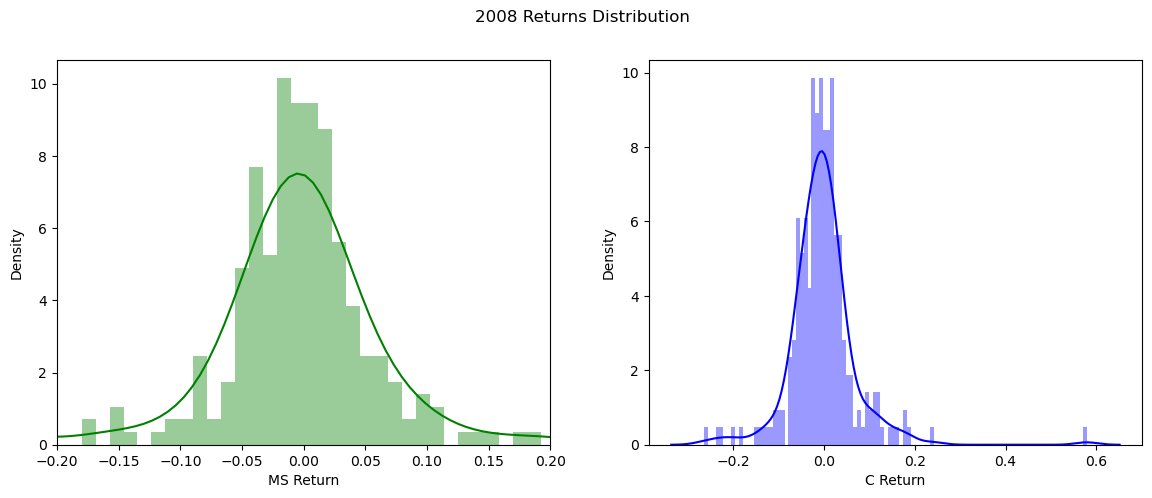

In [220]:
#2008 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
#MS
sns.distplot(returns.dropna().reset_index()[returns.dropna().reset_index()['Date'].dt.year==2008]['MS Return'], bins=100,color = 'green',ax=axes[0])
#C
sns.distplot(returns.dropna().reset_index()[returns.dropna().reset_index()['Date'].dt.year==2008]['C Return'], bins=100,color = 'blue', ax=axes[1])
axes[0].set_xlim(-.2,.2)
fig.suptitle('2008 Returns Distribution')
#2008 has a large variance due to the volatile market of Financial Crisis.

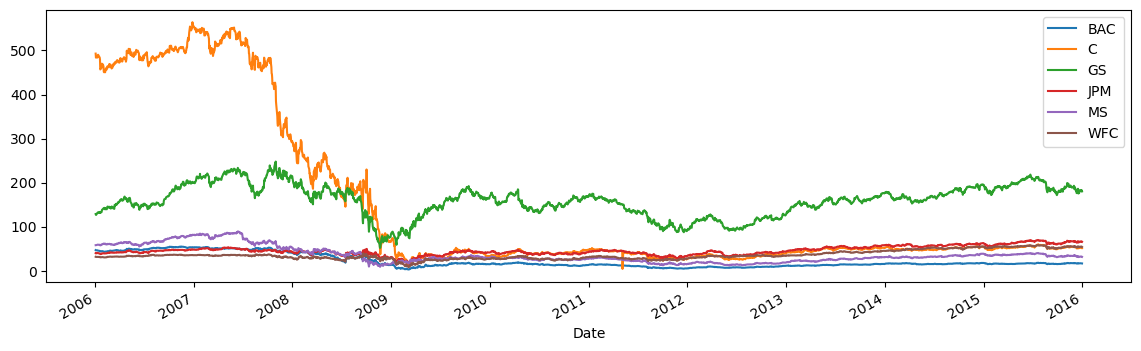

In [216]:
#looping through all the banks and plotting the close price for each bank into a single graph.
for tick in tickers:
    stocks[tick]['Close'].plot(label = tick, figsize = (14,4))
plt.legend()
plt.show()

In [217]:
stocks.xs(key = 'Close',axis=1,level='Stock Info').head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.9,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.8,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.2,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.2,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.9,130.39,40.67,59.19,31.68
